# Fractional Brownian Motion Parameter Estimation Using Periodogram Method

The periodigram method uses the fractional brownian noise power spectrum to estimate the Hurst,</br>
denoted by $H$. The power spectrum is the Fourier transform of the fractional brownian motion noise autocorrelation</br>
function. This relationship is called the Weiner-Khichnin theorem.</br>

Let $Z^H(t)$ denote a fractional path then fractional brownian noise is defined by,

$
\begin{align}
\Delta Z_k^H = Z^H(t_k) - Z^H(t_{k-1})
\end{align}
$

where $t_k = k \Delta t$. It follows that,

$
\begin{align}
Z^H(n\Delta t) = \sum_{i=1}^n \Delta Z_k^H
\end{align}
$

The autocovariance of fractional brownian noise is given by,

$
\begin{align}
\gamma^H_n = \text{Cov}[\Delta Z^H_t \Delta Z^H_{t+n}] = \frac{1}{2}\Delta t^{2H}[(n-1)^{2H} + (n+1)^{2H} - 2n^{2H}]
\end{align}
$

Since $\text{Var}(\Delta Z_k^H) = \Delta t^{2H}$ the autocorrelation coefficient is defined by,</br>

$
\begin{align}
\rho^H_n = \frac{\gamma^H_n}{\Delta t^{2H}} = \frac{1}{2}[(n-1)^{2H} + (n+1)^{2H} - 2n^{2H}]
\end{align}
$

From the Weiner-Khichnin theorem the power spectrum is given by,</br>

$
\begin{align}
\hat{\rho}^H_\omega = \frac{1}{2} \int_{-\infty}^{\infty} \rho^H_n e^{-i \omega n} dn
\end{align}
$

It can be shown that fir $\omega \ggg 1$,

$
\begin{align}
\hat{\rho}^H_\omega \approx C\lvert \omega \rvert^{1 - 2H}
\end{align}
$

where $C$ is independent of $\omega$. It follows that $H$ can be determined by using OLS on $\hat{\rho}^H_\omega$ as a</br>
function of $\omega$.

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import fbm
from lib import bm
from lib import plots
from lib import config
from lib import stats
from lib.plot_config import (PlotDataType, RegressionPlotType)
from lib.stats import RegressionType

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
Δt = 1.0
npts = 2**10
ω = numpy.linspace(1.0, npts, npts-1)

## Power Spectrum Simulation H=0.8

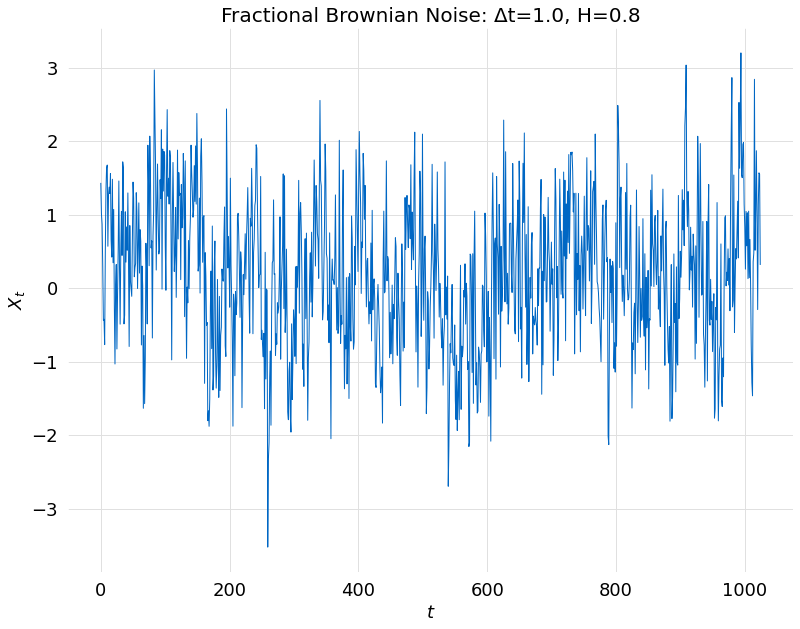

In [3]:
H = 0.8
samples = fbm.fft_noise(H, npts)
title = f"Fractional Brownian Noise: Δt={Δt}, H={H}"
plots.curve(samples[:npts], title=title, lw=1)

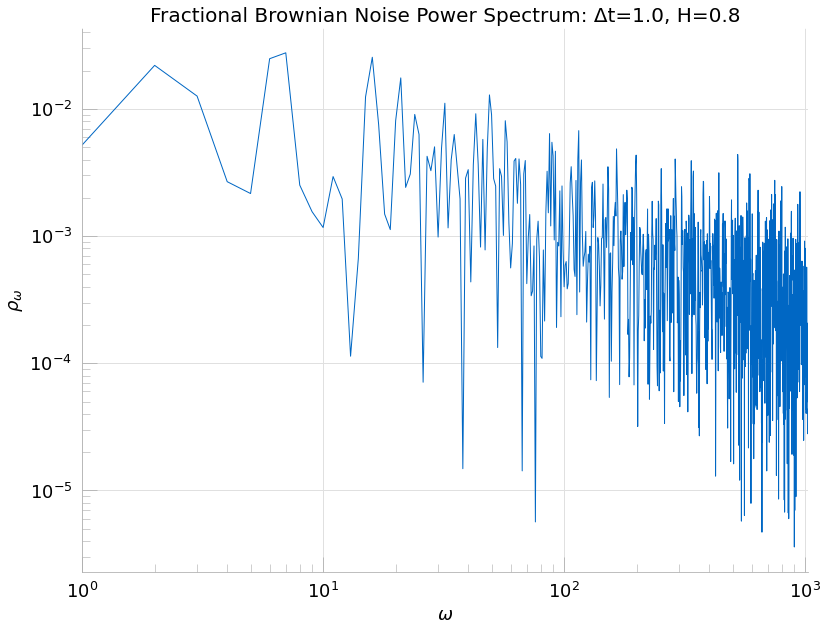

In [4]:
ps = stats.pspec(samples)
title = f"Fractional Brownian Noise Power Spectrum: Δt={Δt}, H={H}"
plots.curve(ps, title=title, data_type=PlotDataType.PSPEC, lw=1)

In [5]:
results = stats.OLS(ps, ω, RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     302.5
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           1.53e-59
Time:                        20:50:44   Log-Likelihood:                -793.71
No. Observations:                1023   AIC:                             1591.
Df Residuals:                    1021   BIC:                             1601.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6702      0.100    -16.624      0.000      -1.867      -1.473
x1            -0.6687      0.038    -17.392      0.000      -0.744      -0.593
==============================================================================
Omnibus:                       95.754   Durbin-Watson:                   1.407
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.626
Skew:                          -0.761   Prob(JB):                     5.26e-28
Kurtosis:                       3.794   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

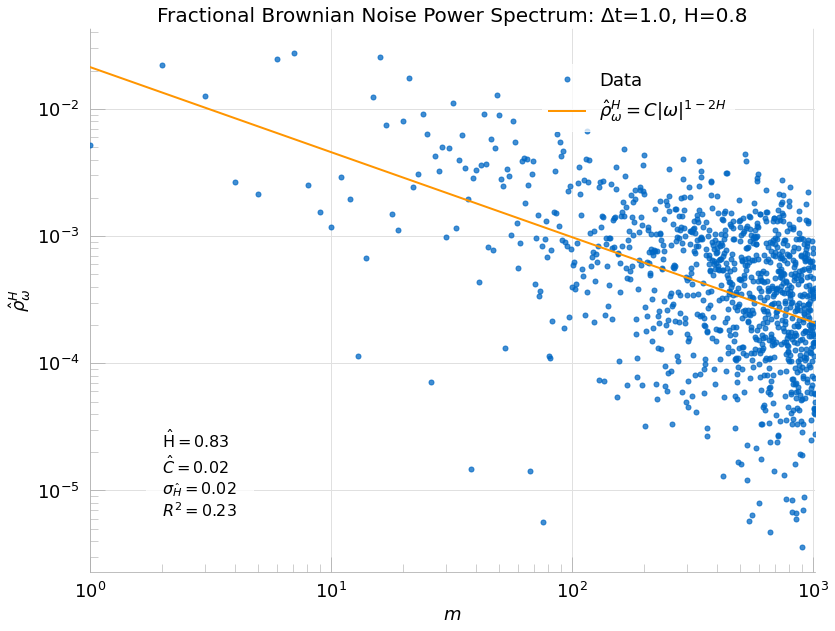

In [6]:
title = title = title = f"Fractional Brownian Noise Power Spectrum: Δt={Δt}, H={H}"
plots.regression(ps, ω, results, title=title, type=RegressionPlotType.FBM_PSPEC)

## Power Spectrum Simulation H=0.3

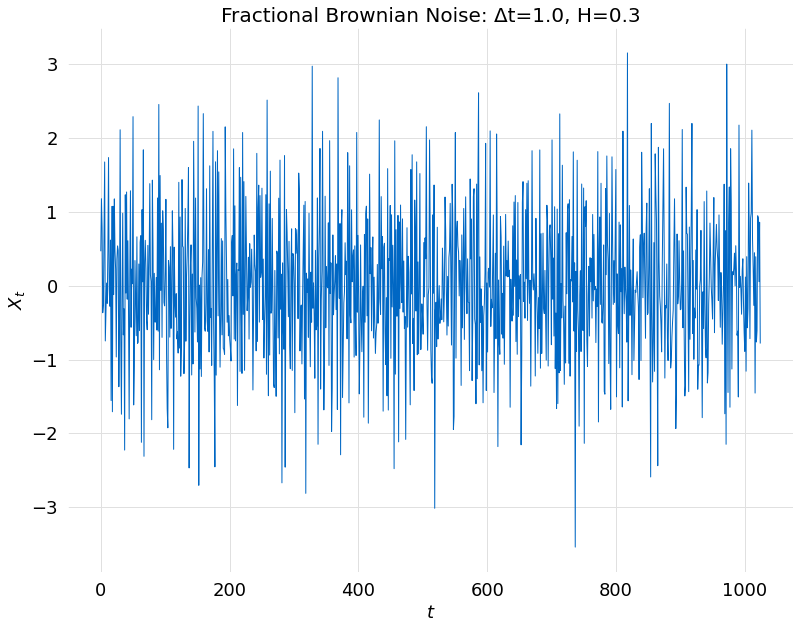

In [7]:
H = 0.3
samples = fbm.fft_noise(H, npts)
title = f"Fractional Brownian Noise: Δt={Δt}, H={H}"
plots.curve(samples[:npts], title=title, lw=1)

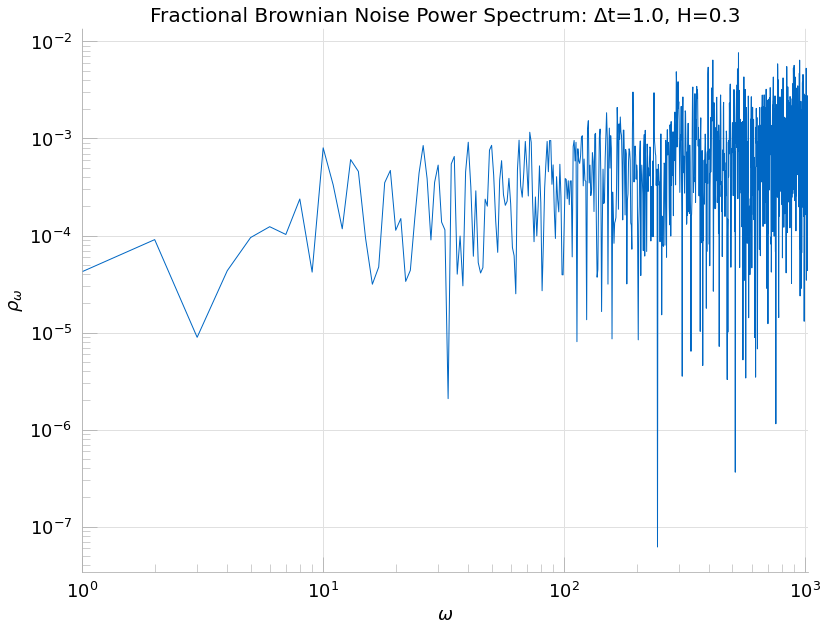

In [8]:
ps = stats.pspec(samples)
title = f"Fractional Brownian Noise Power Spectrum: Δt={Δt}, H={H}"
plots.curve(ps, x=ω, title=title, data_type=PlotDataType.PSPEC, lw=1)

In [9]:
results = stats.OLS(ps, ω, RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     106.2
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           9.27e-24
Time:                        20:50:45   Log-Likelihood:                -887.47
No. Observations:                1023   AIC:                             1779.
Df Residuals:                    1021   BIC:                             1789.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4164      0.110    -40.108      0.000      -4.632      -4.200
x1             0.4343      0.042     10.305      0.000       0.352       0.517
==============================================================================
Omnibus:                      315.698   Durbin-Watson:                   1.408
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1118.271
Skew:                          -1.467   Prob(JB):                    1.48e-243
Kurtosis:                       7.198   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

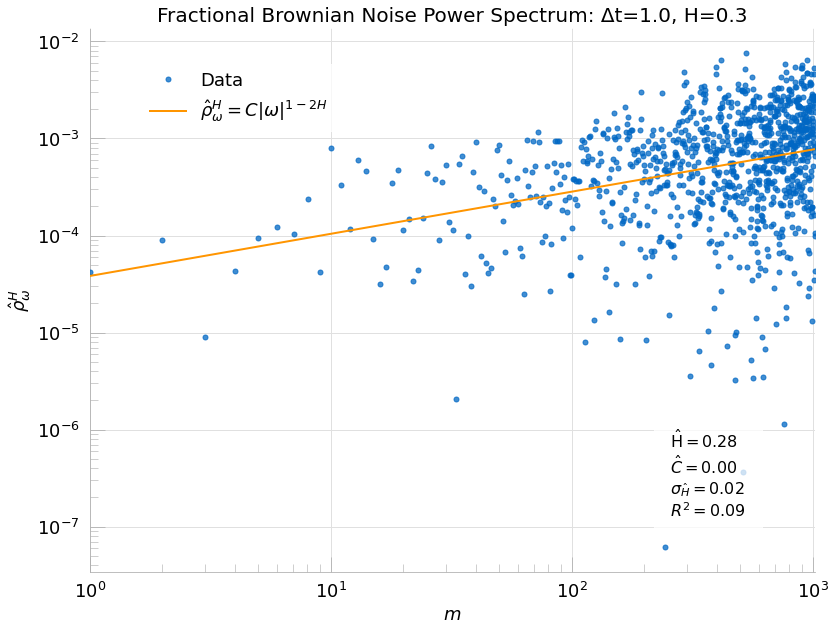

In [10]:
title = title = title = f"Fractional Brownian Noise Power Spectrum: Δt={Δt}, H={H}"
plots.regression(ps, ω, results, title=title, type=RegressionPlotType.FBM_PSPEC)